In [298]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
# %matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [299]:
stock_data = pd.read_csv(file_path, header=0)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

NameError: name 'file_path' is not defined

In [ ]:
stock_data.head()

,Adj Close,Close,Date,High,Low,Open
0,189.79,189.789993,2023-11-27,190.669998,188.899994,189.919998
1,190.40,190.399994,2023-11-28,191.080002,189.399994,189.779999
2,189.37,189.369995,2023-11-29,192.089996,188.970001,190.899994
3,189.95,189.949997,2023-11-30,190.320007,188.190002,189.839996
4,191.24,191.240005,2023-12-01,191.559998,189.229996,190.330002


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Adj Close  20 non-null     float64       
 1   Close      20 non-null     float64       
 2   Date       20 non-null     datetime64[ns]
 3   High       20 non-null     float64       
 4   Low        20 non-null     float64       
 5   Open       20 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.1 KB


In [ ]:
stock_data

,Adj Close,Close,Date,High,Low,Open
0,189.79,189.789993,2023-11-27,190.669998,188.899994,189.919998
1,190.40,190.399994,2023-11-28,191.080002,189.399994,189.779999
2,189.37,189.369995,2023-11-29,192.089996,188.970001,190.899994
3,189.95,189.949997,2023-11-30,190.320007,188.190002,189.839996
4,191.24,191.240005,2023-12-01,191.559998,189.229996,190.330002
5,189.43,189.429993,2023-12-04,190.050003,187.449997,189.979996
6,193.42,193.419998,2023-12-05,194.399994,190.179993,190.210007
7,192.32,192.320007,2023-12-06,194.759995,192.110001,194.449997
8,194.27,194.270004,2023-12-07,195.000000,193.589996,193.630005
9,195.71,195.710007,2023-12-08,195.990005,193.669998,194.199997


In [ ]:
print(f'Dataframe contains stock prices between {stock_data.Date.min()} {stock_data.Date.max()}')
print(f'Total days = {(stock_data.Date.max() - stock_data.Date.min()).days} days')

Dataframe contains stock prices between 2023-11-27 00:00:00 2023-12-22 00:00:00
Total days = 25 days


In [ ]:
stock_data.describe()

,Adj Close,Close,Date,High,Low,Open
count,20.000000,20.000000,20,20.000000,20.000000,20.000000
mean,193.668500,193.668501,2023-12-09 12:00:00,194.695000,192.220999,193.524999
min,189.370000,189.369995,2023-11-27 00:00:00,190.050003,187.449997,189.779999
25%,191.030000,191.030003,2023-12-03 06:00:00,191.957497,189.357494,190.300003
50%,193.935000,193.935005,2023-12-09 12:00:00,194.879997,192.540001,193.915001
75%,195.755000,195.755005,2023-12-15 18:00:00,196.982498,194.500000,196.092499
max,198.110000,198.110001,2023-12-22 00:00:00,199.619995,197.000000,198.020004
std,2.911014,2.911017,NaN,2.926810,2.892769,2.864710


<Axes: >

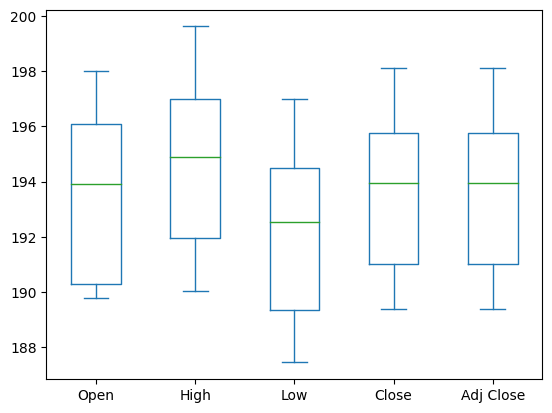

In [ ]:
stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [ ]:
#Setup plot graph
title = f"Stock Prices of {ticker}"
layout = go.Layout(
    title=title,
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
)

stock_graph_data = [{ 'x':stock_data['Date'], 'y':stock_data['Close']}]
plot = go.Figure(data=stock_graph_data, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
#Building the linear regression model
from sklearn.model_selection import train_test_split

#For preproccesing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#Split data into train and test sets
X = np.array(stock_data.index).reshape(-1,1)
Y = stock_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)

stock_graph_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_graph_data, layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
#Calculate model score
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5244273022392825	0.6367675652675718
MSE       3.582771134364371	3.2467263195700617



In [ ]:

future_X = np.array(range(len(stock_data), len(stock_data) + int(duration))).reshape(-1, 1).astype(np.float64)

prediction = lm.predict(future_X)

array([196.53645394, 195.85959793, 191.4600339 , 193.82902992,
       193.49060191, 194.50588592, 190.78317789, 194.16745792,
       195.18274193, 192.47531791, 192.1368899 , 196.19802593,
       191.7984619 , 190.10632189])

In [ ]:
with open('data_file.txt', 'w') as file:
    file.write(','.join(map(str, prediction)))
